<span style="color:cyan; font-size:3em; font-family:Papyrus"> 
<div align="center"><b>Pregunta 4</b></div>
</span> 

Este conjunto de datos contiene 2126 registros de características extraídas de exámenes de cardiotocogramas, que 
luego fueron clasificados por tres obstetras expertos en 3 clases:

* Normal
* Suspect
* Pathological

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import feather

data = pd.read_feather('./data/cardiotocograms_2000.feather')
data.sample(3)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
498,130.0,0.015,0.115,0.000,0.0,0.0,0.0,31.0,2.6,0.0,...,50.0,170.0,12.0,0.0,157.0,151.0,156.0,24.0,1.0,1.0
1418,142.0,0.009,0.000,0.009,0.0,0.0,0.0,41.0,1.0,0.0,...,132.0,173.0,3.0,0.0,150.0,150.0,151.0,3.0,0.0,1.0
138,159.0,0.001,0.000,0.008,0.0,0.0,0.0,57.0,0.5,8.0,...,148.0,188.0,0.0,0.0,167.0,169.0,170.0,5.0,0.0,2.0


In [25]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# Preprocesamiento

## 1. Muestre un diagrama de barras para la cantidad de observaciones en cada nivel de la variable fetal_health

In [3]:
print("Niveles de la varible fethal_health:")
data['fetal_health'].value_counts()  

Niveles de la varible fethal_health:


1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

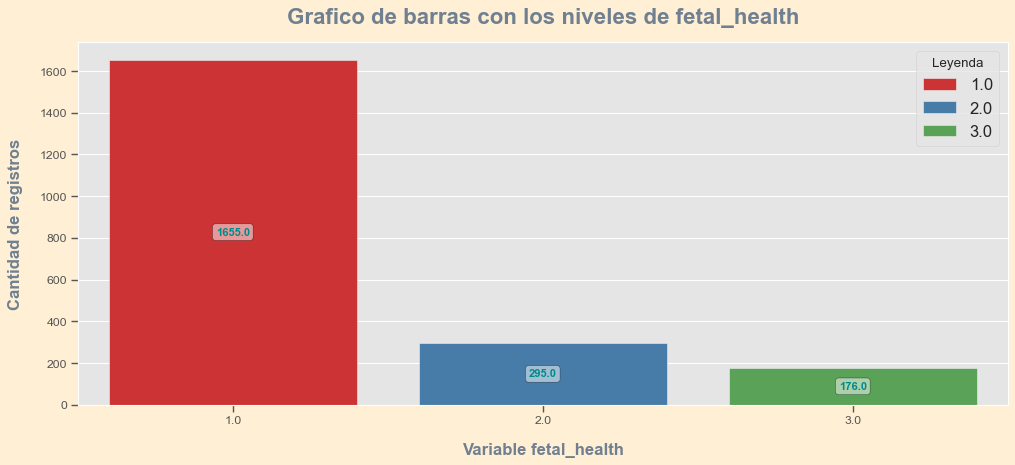

In [24]:
from turtle import title


fetal_health_counts = data['fetal_health'].value_counts().values[1]

fig = plt.figure(figsize=(15,6), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
ax = sns.countplot(x='fetal_health', data=data, palette='Set1', hue='fetal_health', dodge=False)
plt.title('Grafico de barras con los niveles de fetal_health', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.xlabel('Variable fetal_health', fontsize=15, color="slategrey", fontweight="bold", labelpad=15)
plt.ylabel('Cantidad de registros', fontsize=15, color="slategrey", fontweight="bold", labelpad=15)
plt.xticks(rotation=0)
for p in ax.patches:
   ax.annotate(
      text='{:.1f}'.format(p.get_height()), 
      xy=(p.get_x() + p.get_width() / 2, p.get_height() / 2),  
      ha='center', va='center',
      rotation=0, color='darkcyan', 
      fontweight='bold',
      bbox=dict(boxstyle="round", facecolor='white', edgecolor='black', alpha=0.5))
plt.legend(loc='upper right', fontsize=15, frameon=True, title= 'Leyenda')
plt.show()


## 2. Considere dividir el conjunto de datos en función de la variable objetivo : fetal_health. Para cada uno de estos 3 conjuntos de datos realice un estudio descriptivo de las variables :

* baseline value
* accelerations
* fetal_movement
* uterine_contractions
* light_decelerations

In [5]:
# split dataset base on objective function fetal_health getting 3 sets
data_1 = data[data['fetal_health'] == 1]
data_2 = data[data['fetal_health'] == 2]
data_3 = data[data['fetal_health'] == 3]

In [6]:
# make a descriptive study of the varibles baseline value, accelerations, fetal_movement, uterine_contractions, light_decelerations
data_1.describe()
data_2.describe()
data_3.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,176.000000,176.000000,176.000000,176.000000,176.00000,176.000000,176.000000,176.000000,176.000000,176.000000,...,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0
mean,131.687500,0.000392,0.025676,0.003784,0.00367,0.000034,0.001273,64.539773,1.575568,22.846591,...,83.982955,162.329545,4.443182,0.346591,114.607955,112.977273,119.562500,50.732955,-0.073864,3.0
std,9.433016,0.001008,0.085765,0.003627,0.00414,0.000182,0.001371,14.452231,1.199393,33.995702,...,34.176930,21.674328,3.315274,0.675523,26.146833,22.782940,19.338092,60.581867,0.692984,0.0
min,110.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,18.000000,0.200000,0.000000,...,50.000000,128.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,3.0
25%,128.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,61.000000,0.300000,0.000000,...,55.750000,146.000000,1.000000,0.000000,91.000000,95.750000,106.000000,1.000000,-1.000000,3.0
50%,132.000000,0.000000,0.001000,0.003000,0.00200,0.000000,0.001000,65.000000,1.700000,0.000000,...,66.000000,158.500000,4.000000,0.000000,122.500000,106.500000,116.000000,36.500000,0.000000,3.0
75%,134.000000,0.000000,0.002000,0.006000,0.00700,0.000000,0.002000,73.250000,2.500000,64.750000,...,123.250000,177.750000,7.000000,0.250000,135.000000,134.000000,135.000000,80.000000,0.000000,3.0
max,152.000000,0.005000,0.375000,0.014000,0.01500,0.001000,0.005000,87.000000,6.300000,91.000000,...,154.000000,230.000000,14.000000,3.000000,160.000000,158.000000,160.000000,269.000000,1.000000,3.0


### Data 1 (fetal_health level 1)

In [7]:
data_1 = data_1[['baseline value', 'accelerations','fetal_movement','uterine_contractions','light_decelerations']]

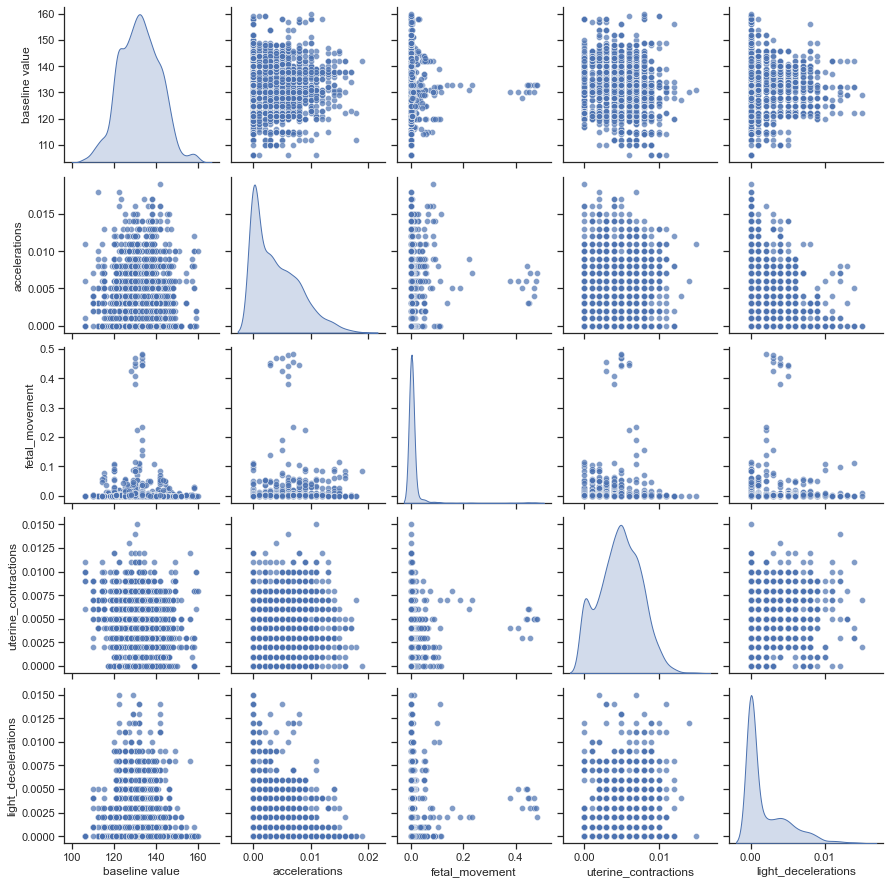

In [8]:
import seaborn as sns
sns.set(style="ticks", color_codes=True);

# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

# Make the pair plot with a some aesthetic changes
sns.pairplot(data_1 , diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

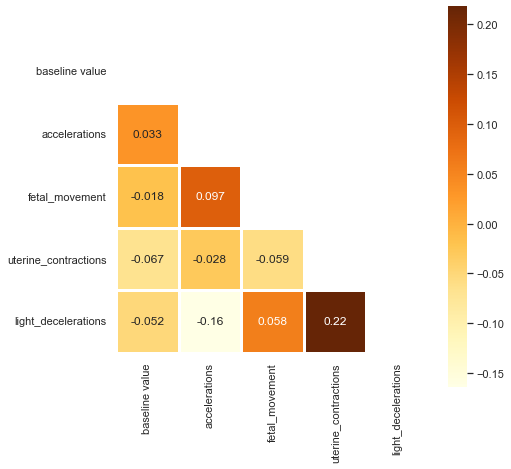

In [9]:
correlation = data_1.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    ax = sns.heatmap(correlation, mask=mask, square=True,linewidths=2.5, cmap="YlOrBr",annot=True)

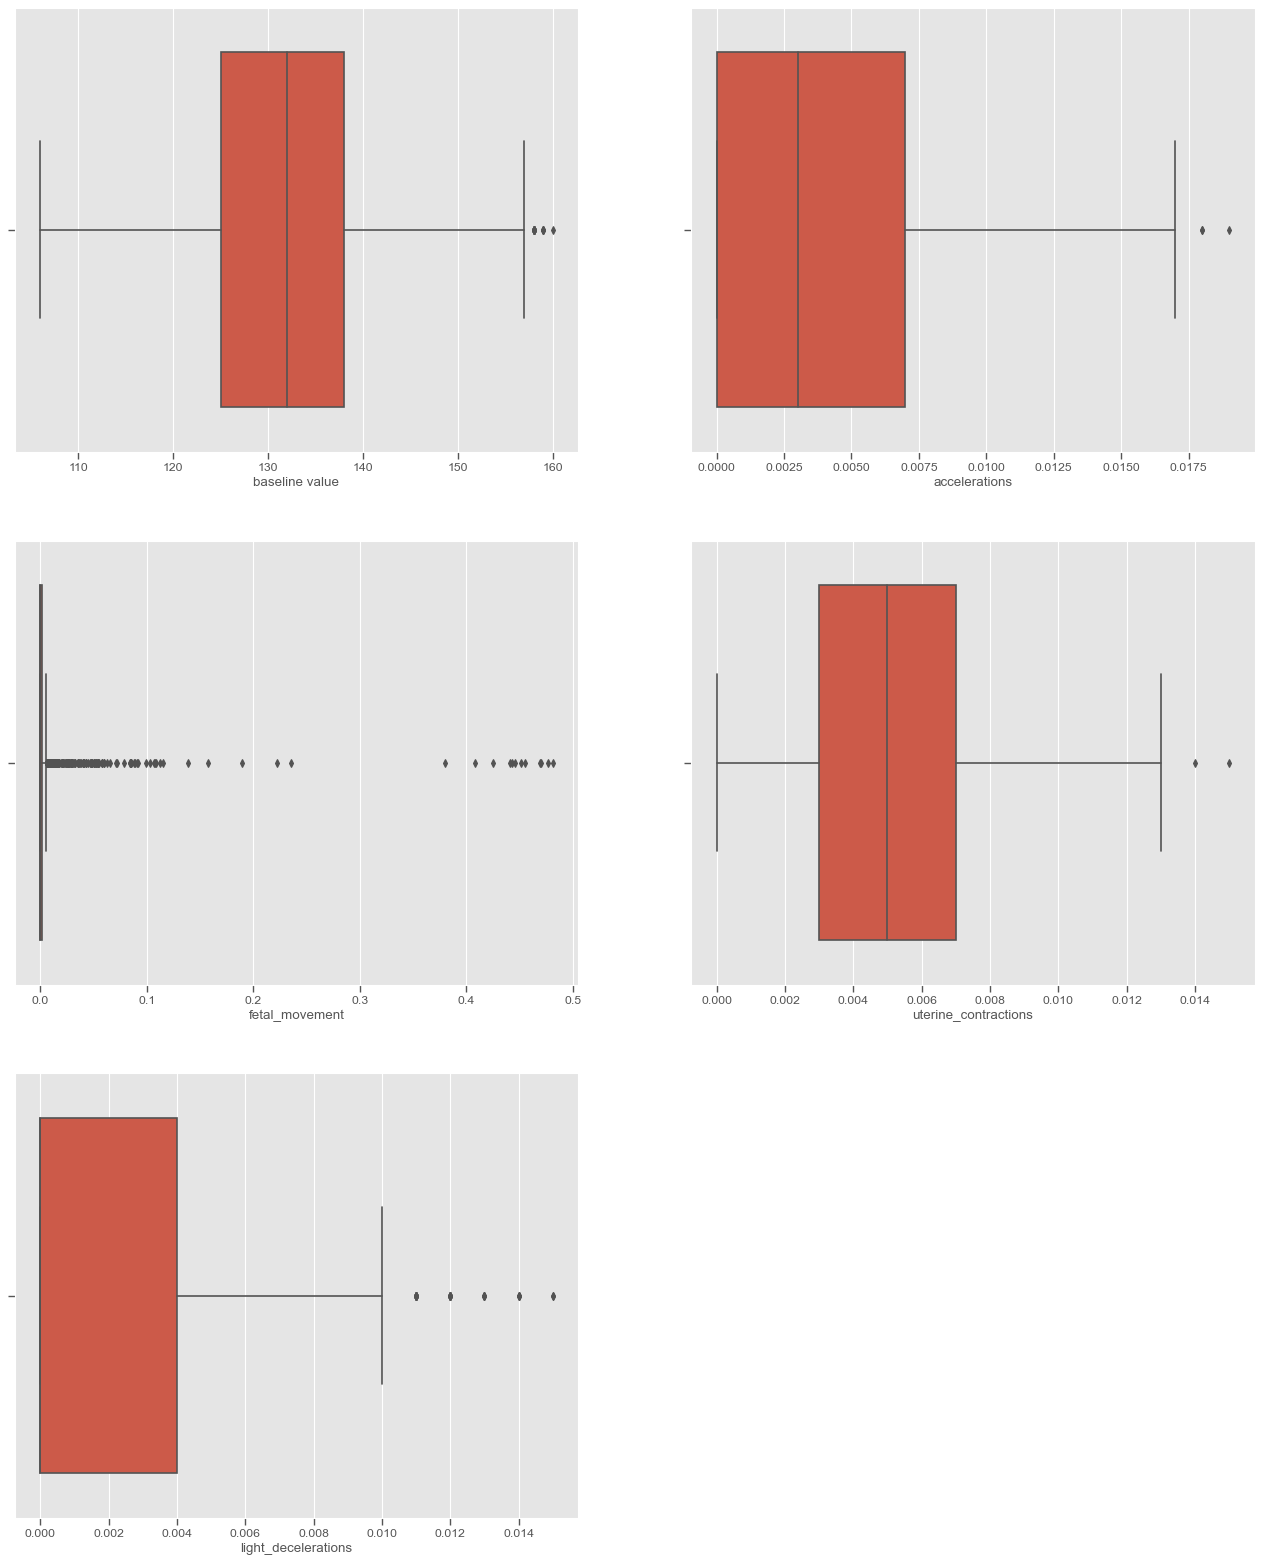

In [ ]:
ncols = 2
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,25), dpi=80)
plt.style.use('ggplot')

columns = data_1.columns
counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i, j]
        if counter < len(columns):
            sns.boxplot(x = columns[counter], data = data_1, ax = ax)
            # sns.swarmplot(x = columns[counter], data = data_1, color = 'blue', alpha = 0.5, ax = ax, stripplot=False)
        else:
            ax.set_axis_off()
        counter += 1
plt.show()



In [ ]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(data_1, title='Reporte de perfil de datos de la variable fetal_health 1')

c:\Users\joel_\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data 2 (fetal_health level 2)

In [ ]:
data_2 = data_2[['baseline value', 'accelerations','fetal_movement','uterine_contractions','light_decelerations']]

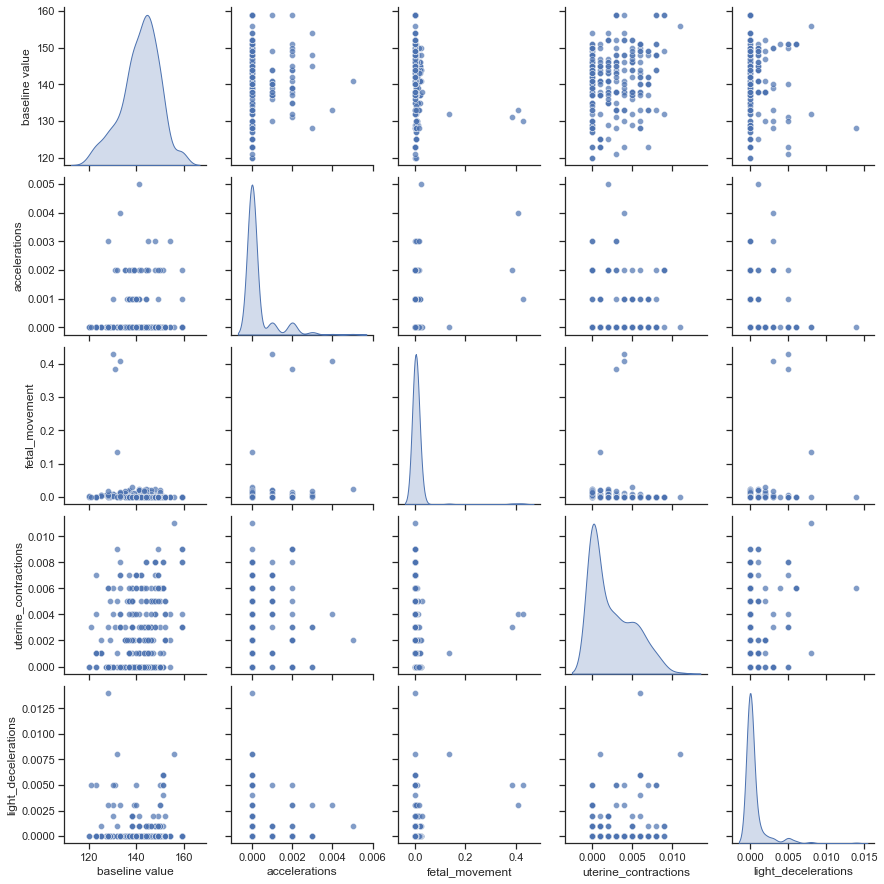

In [ ]:
import seaborn as sns
sns.set(style="ticks", color_codes=True);

# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

# Make the pair plot with a some aesthetic changes
sns.pairplot(data_2 , diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

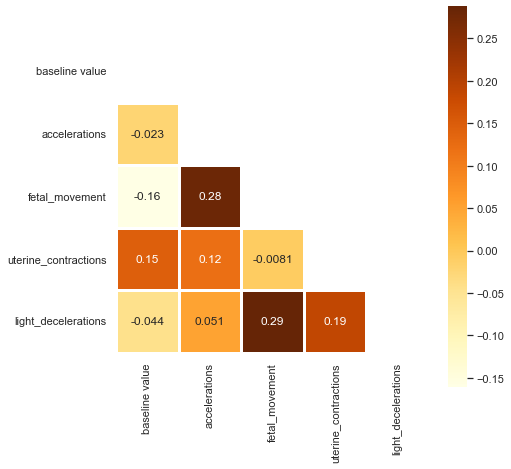

In [ ]:
correlation = data_2.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    ax = sns.heatmap(correlation, mask=mask, square=True,linewidths=2.5, cmap="YlOrBr",annot=True)

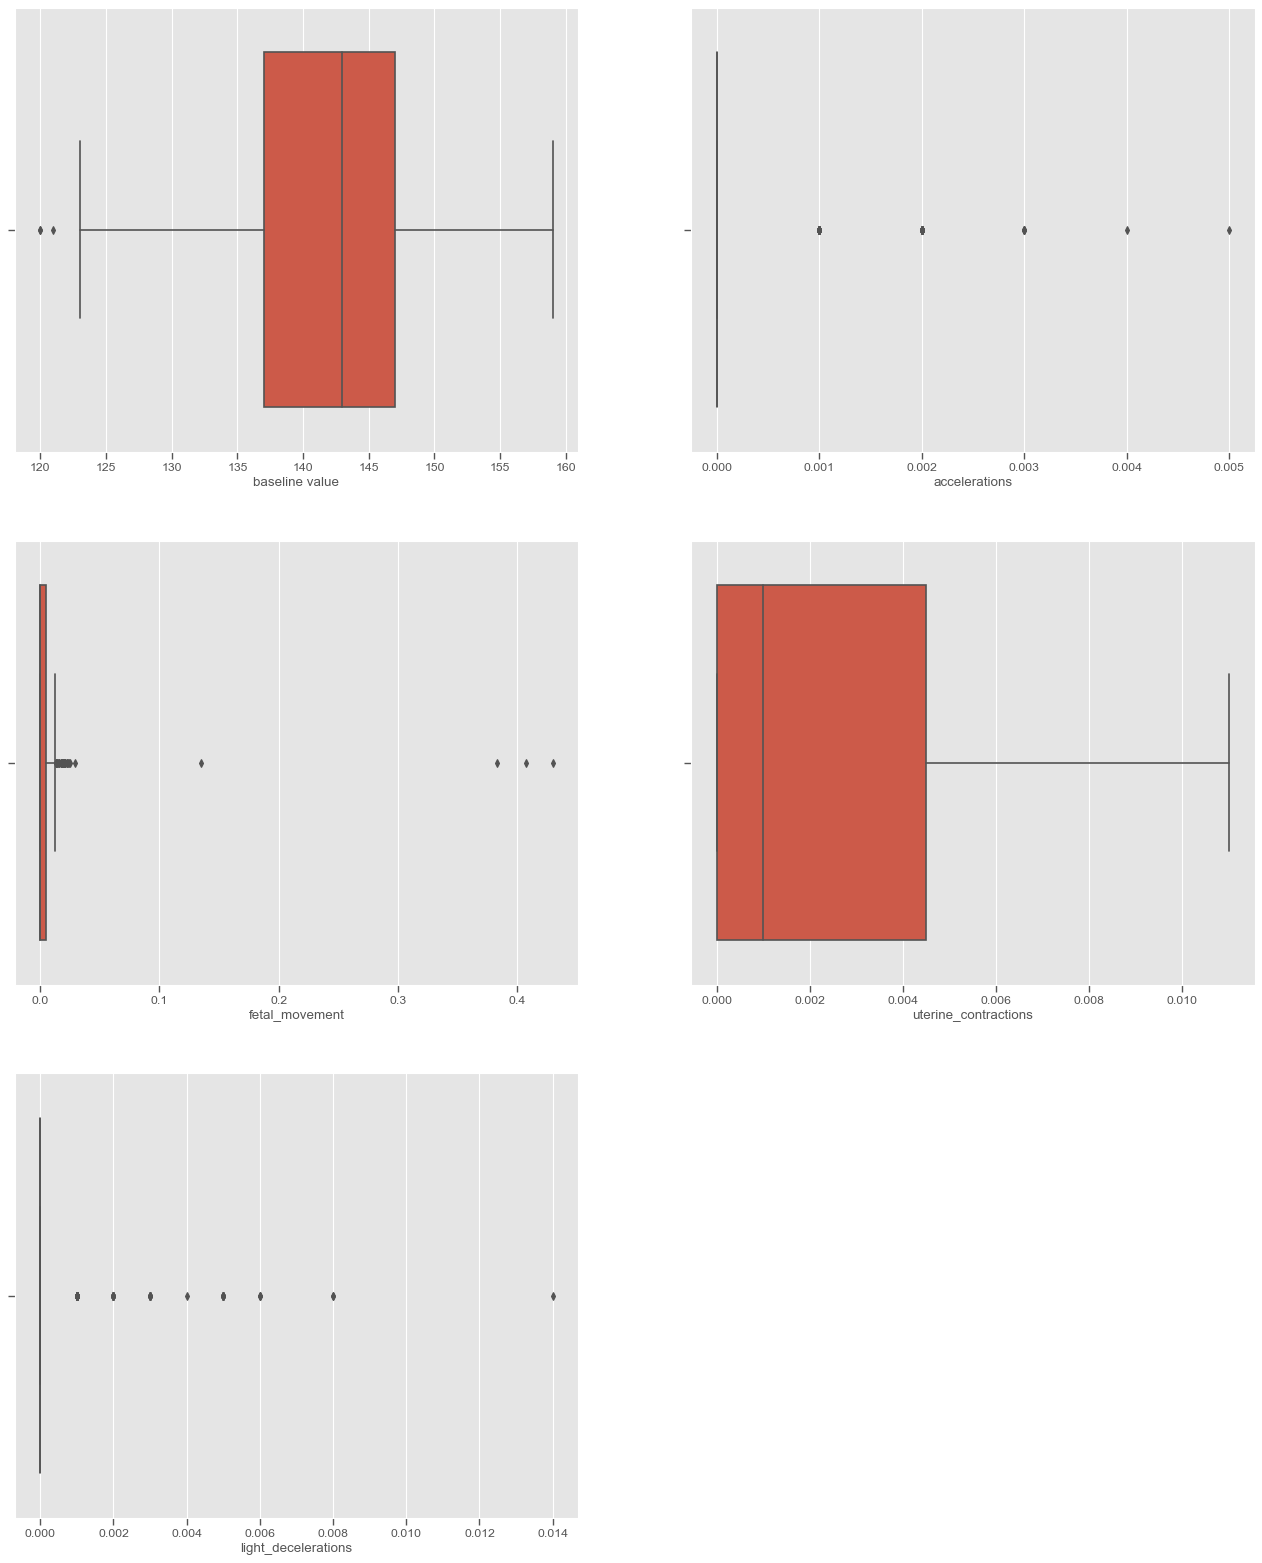

In [ ]:
ncols = 2
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,25), dpi=80)
plt.style.use('ggplot')

columns = data_2.columns
counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i, j]
        if counter < len(columns):
            sns.boxplot(x = columns[counter], data = data_2, ax = ax)
            # sns.swarmplot(x = columns[counter], data = data_2, color = 'blue', alpha = 0.5, ax = ax, stripplot=False)
        else:
            ax.set_axis_off()
        counter += 1
plt.show()

### Data 3 (fetal_health level 3)

In [ ]:
data_3 = data_3[['baseline value', 'accelerations','fetal_movement','uterine_contractions','light_decelerations']]

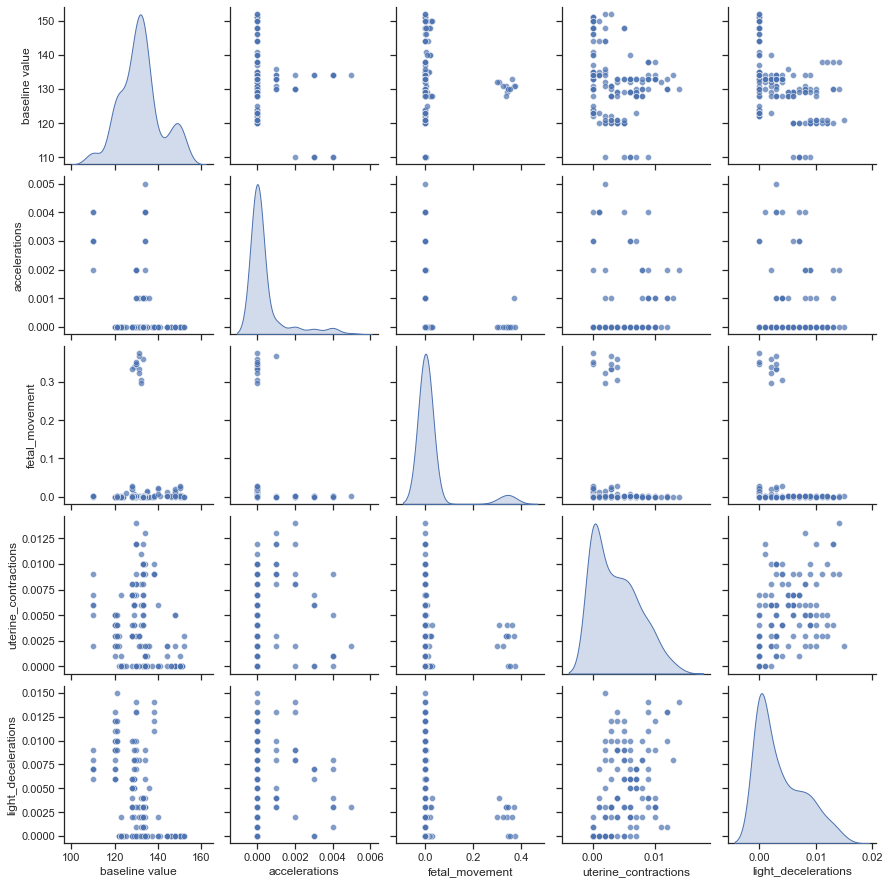

In [ ]:
import seaborn as sns
sns.set(style="ticks", color_codes=True);

# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

# Make the pair plot with a some aesthetic changes
sns.pairplot(data_3 , diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

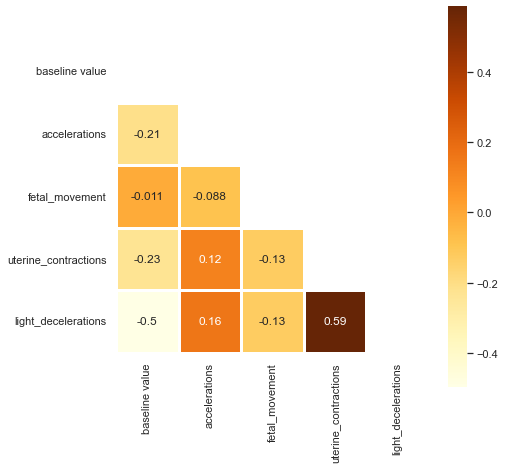

In [ ]:
correlation = data_3.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    ax = sns.heatmap(correlation, mask=mask, square=True,linewidths=2.5, cmap="YlOrBr",annot=True)

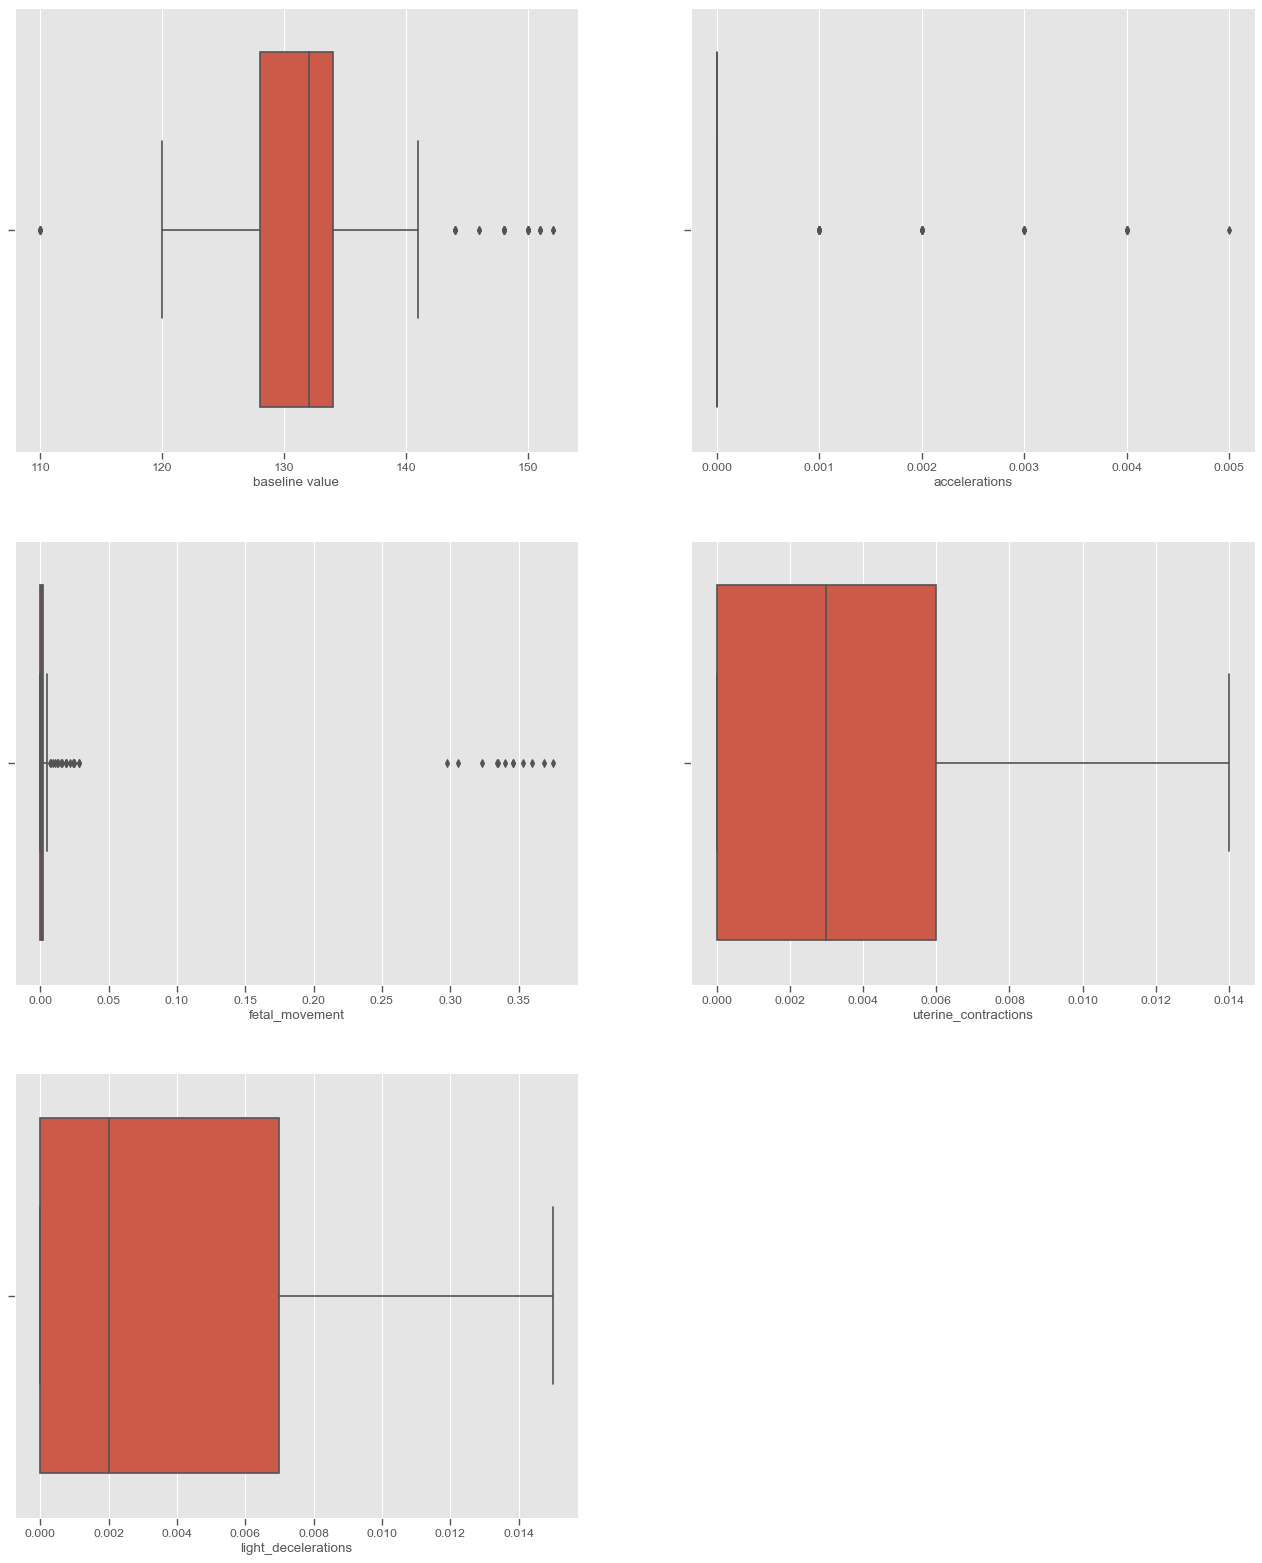

In [ ]:

ncols = 2
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,25), dpi=80)
plt.style.use('ggplot')

columns = data_3.columns
counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i, j]
        if counter < len(columns):
            sns.boxplot(x = columns[counter], data = data_3, ax = ax)
            # sns.swarmplot(x = columns[counter], data = data_3, color = 'blue', alpha = 0.5, ax = ax, stripplot=False)
        else:
            ax.set_axis_off()
        counter += 1
plt.show()